# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"]=(20,10)

# Reading the CSV Files

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
print(df.groupby('area_type')['area_type'].agg('count'))
"""This line of code is using the groupby() method in pandas library to group the data in the df dataframe by the area_type 
column. The agg() method is then used to apply the count() function to each group.This will count the number of occurrences of 
each unique value in the area_type column and return a new dataframe with the counts for each group."""

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64


'This line of code is using the groupby() method in pandas library to group the data in the df dataframe by the area_type \ncolumn. The agg() method is then used to apply the count() function to each group.This will count the number of occurrences of \neach unique value in the area_type column and return a new dataframe with the counts for each group.'

In [6]:
#Removing the not very Important columns
df1=df.drop(['area_type','society','balcony','availability'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Data Cleaning

## Handling the Na values

In [7]:
#Tells Number of Rows with data value Null for each Column in df1
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
#Dropping Na Values
df2=df1.dropna()
#We can give a Column as an Argument to drop only those Rows which have Na value in that Column
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

## Handling Variations in Size Column 

In [9]:
df2['size'].unique() #To see all the unique values in the size Column

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
#We see that 4Bedrooms and 4BHK is same-So we need to tackle this Problem
#Creating New Column to tackle this problem
df2['BHK']=df2['size'].apply(lambda x: int(x.split(" ")[0]))
"""apply() function applies the Lambda function on each of the data in the Column one by one
Lambda function tokenizes the string on basis of space,takes the 1st part and converts it into Integer and add as a value in 
the new Column."""

C:\Users\Kamalpreet Singh\AppData\Local\Temp\ipykernel_25404\564205351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK']=df2['size'].apply(lambda x: int(x.split(" ")[0]))


'apply() function applies the Lambda function on each of the data in the Column one by one\nLambda function tokenizes the string on basis of space,takes the 1st part and converts it into Integer and add as a value in \nthe new Column.'

In [11]:
df2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df2["BHK"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
#Having 43 Bedrooms in Bengalore is not possible-We need to remove this error

In [14]:
df2[df2.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


### Converting Data in range in total_sqft into Single Number

In [15]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
#One of the ways to convert a-b range into a single Number is to take Mean

In [17]:
#To see what types of values are present,we will create is_float function
def is_float(x):
    try:
        float(x)
    except:#If value can't be converted to float
        #As it is not a valid value-Returning False
        return False
    return True#If False is not returned-True will get returned

In [18]:
Valid_Float_Number_Series=df2['total_sqft'].apply(is_float)
print(Valid_Float_Number_Series)

0        True
1        True
2        True
3        True
4        True
         ... 
13315    True
13316    True
13317    True
13318    True
13319    True
Name: total_sqft, Length: 13246, dtype: bool


In [19]:
#To see Non-Valid Float Numbers
Non_Valid_Float_Numbers=~(Valid_Float_Number_Series) #Taking Negation
df2[Non_Valid_Float_Numbers]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [20]:
df2[Non_Valid_Float_Numbers].head()

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [21]:
df2[Non_Valid_Float_Numbers].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [22]:
"""We see Cases of Total Square Feet as range values,values in SqMeter and also in Perch
Our Data is not uniform and Unstructured->So To handle this Non-Uniformity-We need to do Data Cleaning"""

'We see Cases of Total Square Feet as range values,values in SqMeter and also in Perch\nOur Data is not uniform and Unstructured->So To handle this Non-Uniformity-We need to do Data Cleaning'

In [23]:
"""So we will convert Ranges into Single Values
And for Values in Different Units->We will ignore those rows"""
def convert_ranges_to_singleNumber(x):
    tokens=x.split("-")
    if(len(tokens)==2):#Means it is a Range
        #Converting to Float and taking Average
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
        #Conversion to float-It will be Successful if it is a Single Number
    except:#Neither a value in range nor a Single Number
        #Then it is a Value with some other Unit
        return None

In [24]:
print(convert_ranges_to_singleNumber("1056"))
print(convert_ranges_to_singleNumber("2100 - 2850"))
print(convert_ranges_to_singleNumber("4125Perch"))

1056.0
2475.0
None


In [25]:
df3=df2.copy()
#Creating Deep Copy of Original Dataframe
df3['total_sqft']=df3['total_sqft'].apply(convert_ranges_to_singleNumber)#We can also use Lambda Function
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [26]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [27]:
df3[Non_Valid_Float_Numbers].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2475.0,4.0,186.000,4
122,Hebbal,4 BHK,5611.5,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1073.5,2.0,54.005,2
165,Sarjapur,2 BHK,1242.5,2.0,43.490,2
188,KR Puram,2 BHK,1277.5,2.0,56.800,2
410,Kengeri,1 BHK,NaN,1.0,18.500,1
549,Hennur Road,2 BHK,1317.5,2.0,63.770,2
648,Arekere,9 Bedroom,NaN,9.0,265.000,9
661,Yelahanka,2 BHK,1132.5,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,4046.0,4.0,445.000,4


## Feature Engineering and Dimensionality Reduction

In [28]:
df4=df3.copy()
"""Introducing price per sqft feature-Which will be used for Outlier Detection and Removal"""
df4["price_per_sqft"]=(df4["price"]*100000/df4["total_sqft"])
#Price*100000 as Price is in Lakhs
df4.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [29]:
"""Location is a Categorical Feature and may cause Problems
Dummy Encoding will cause High Dimensionality Problem
We solve it by creating a 'Others' Category"""
print(df4.location.unique())
print(len(df4.location.unique()))

['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']
1304


In [30]:
df4.location=df4.location.apply(lambda x: x.strip()) #Just removing Spaces before and after Location Name
location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
(location_stats)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [31]:
#Seeing Location with count less than or equal to 10
#location_stats is a Numpy Series so Condition can be applied like this-
print(len(location_stats[location_stats<=10]))
"""We can add such Locations under Others Category"""

1052


'We can add such Locations under Others Category'

In [32]:
locations_count_less_than_10=location_stats[location_stats<=10]
locations_count_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [33]:
len(df4.location.unique())

1293

In [34]:
#Applying Transformation to create Others Category
df4.location=df4.location.apply(lambda x:"Other" if x in locations_count_less_than_10 else x)
len(df4.location.unique())

242

In [35]:
df4.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [36]:
print(df4.location.unique())

['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli'
 'Lingadheeranahalli' 'Kothanur' 'Whitefield' 'Old Airport Road'
 'Rajaji Nagar' 'Marathahalli' 'Other' '7th Phase JP Nagar' 'Gottigere'
 'Sarjapur' 'Mysore Road' 'Bisuvanahalli' 'Raja Rajeshwari Nagar'
 'Kengeri' 'Binny Pete' 'Thanisandra' 'Bellandur' 'Electronic City'
 'Ramagondanahalli' 'Yelahanka' 'Hebbal' 'Kasturi Nagar' 'Kanakpura Road'
 'Electronics City Phase 1' 'Kundalahalli' 'Chikkalasandra'
 'Murugeshpalya' 'Sarjapur  Road' 'HSR Layout' 'Doddathoguru' 'KR Puram'
 'Bhoganhalli' 'Lakshminarayana Pura' 'Begur Road' 'Varthur'
 'Bommanahalli' 'Gunjur' 'Devarachikkanahalli' 'Hegde Nagar'
 'Haralur Road' 'Hennur Road' 'Kothannur' 'Kalena Agrahara'
 'Kaval Byrasandra' 'ISRO Layout' 'Garudachar Palya' 'EPIP Zone'
 'Dasanapura' 'Kasavanhalli' 'Sanjay nagar' 'Domlur'
 'Sarjapura - Attibele Road' 'Yeshwanthpur' 'Chandapura' 'Nagarbhavi'
 'Devanahalli' 'Ramamurthy Nagar' 'Malleshwaram' 'Akshaya Nagar'
 'Shampura' 'Kadugodi' 'LB

## Outlier Detection and Removal

In [ ]:
"""Outliers are extreme variations in a dataset
We can use Standard Deviation or Domain Knowledge to remove them
So Domain Knowledge be like For Total_sqft and BHK given-
The value of Total_sqft/BHK is always greater than a threshold
Say The Threshold by a person expert in Real Estates say It is generally 300sqft for 1Bedroom
So For Total_sqft=600 and BHK=6->Total_sqft per BHK=100 seems invalid as it is very low than 300"""

In [37]:
df5=df4.copy()
df5[df5.total_sqft/df5.BHK<300].head()
#These are clearly data anomalies and we should remove It

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,Other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [42]:
#Number of Rows in our Dataframe
print(df5.shape)
part_to_remove=df5[df5.total_sqft/df5.BHK<300]
removalcondition=(df5.total_sqft/df5.BHK<300)

(13246, 7)


In [43]:
#So Creating a New Dataframe with removed Data Anomalies
#df6=df5[~(part_to_remove)] #Out of df5,Negate 'part_to_remove'
df6=df5[~removalcondition]
print(df6.shape)

(12502, 7)


In [44]:
#Now Finding Outliers according to the other Features
"""We are going to look at properties where price_per_sqft is very very high or very very low"""
df6.price_per_sqft.describe()#Getting Statistics on the Column

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [45]:
#We see max and min values to be big outliers
"""As we are creating a generic model,It makes sense to remove extreme cases
We are assuming that our dataset has Normal Distribution
So 68% datapoints will lie between Mean and one Standard Deviation
These implies we assume for a value val-
u-sd<val<u+sd"""
def remove_PricePerSqft_Outliers(df):
    df_output=pd.DataFrame()
    for key,subDataFrame in df.groupby('location'):#Grouping by Location gives Dictionary with Key=Location and Value=SubDataframe
        #Getting Mean and Standard Deviation for the SubDataframe for each location
        u=np.mean(subDataFrame.price_per_sqft)
        sd=np.std(subDataFrame.price_per_sqft)
        reducedDataFrame=subDataFrame[((subDataFrame.price_per_sqft>(u-sd))&(subDataFrame.price_per_sqft<(u+sd)))]
        #Now Appending these filtered out values in df_output
        df_output=pd.concat([df_output,reducedDataFrame],ignore_index=True)
    return df_output

df7=remove_PricePerSqft_Outliers(df6)
print(df6.shape)
print(df7.shape)

(12502, 7)
(10241, 7)


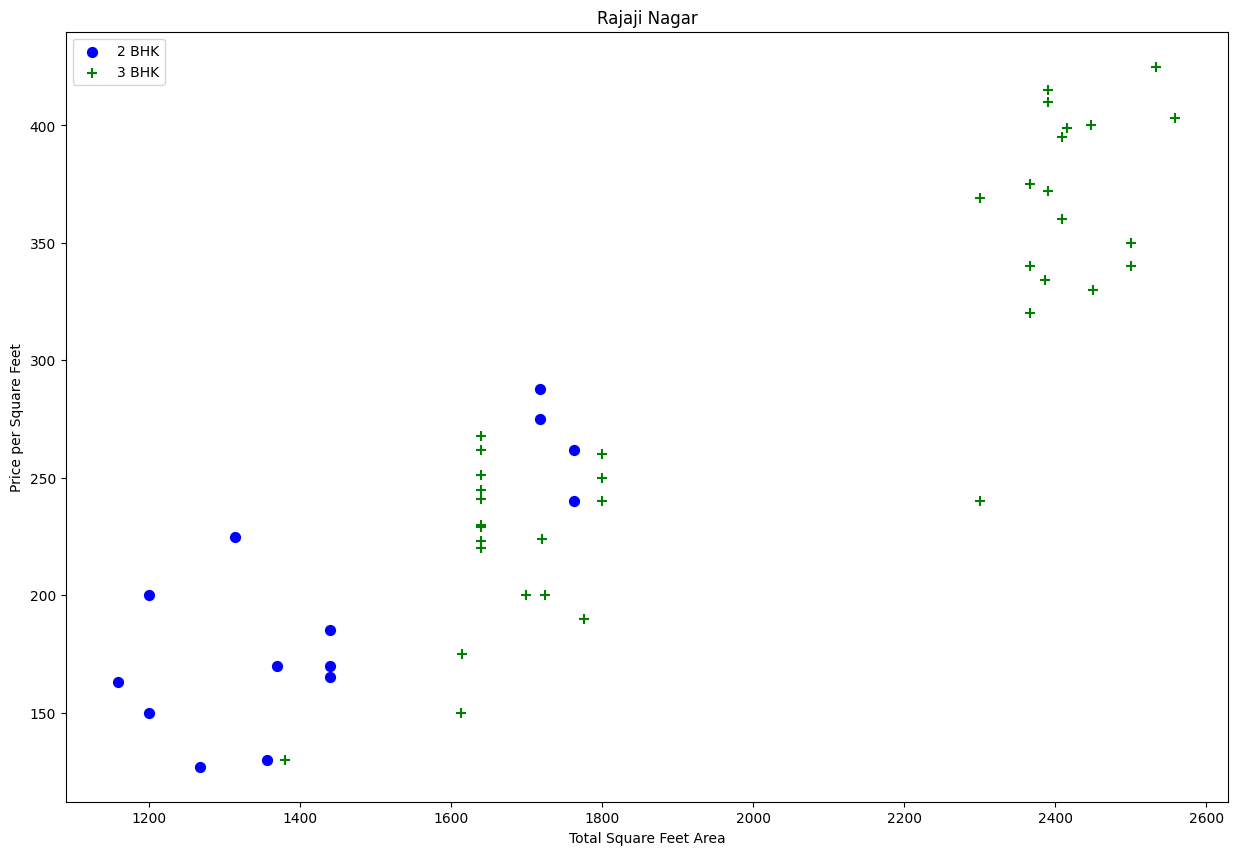

In [47]:
#Now Comparing the prices of 2BHK and 3BHK properties
#To see whether price of 2BHK should be less than price of 3BHK
def plot_scatter_chart(df,inputlocation):
    #Creating the Dataframes
    bhk2=df[(df.location==inputlocation)&(df.BHK==2)]
    bhk3=df[(df.location==inputlocation)&(df.BHK==3)]
    #Creating the ScatterPlot
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color="blue",label="2 BHK",s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker="+",color="green",label="3 BHK",s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price per Square Feet")
    plt.title(inputlocation)
    plt.legend()
plot_scatter_chart(df7,"Rajaji Nagar")

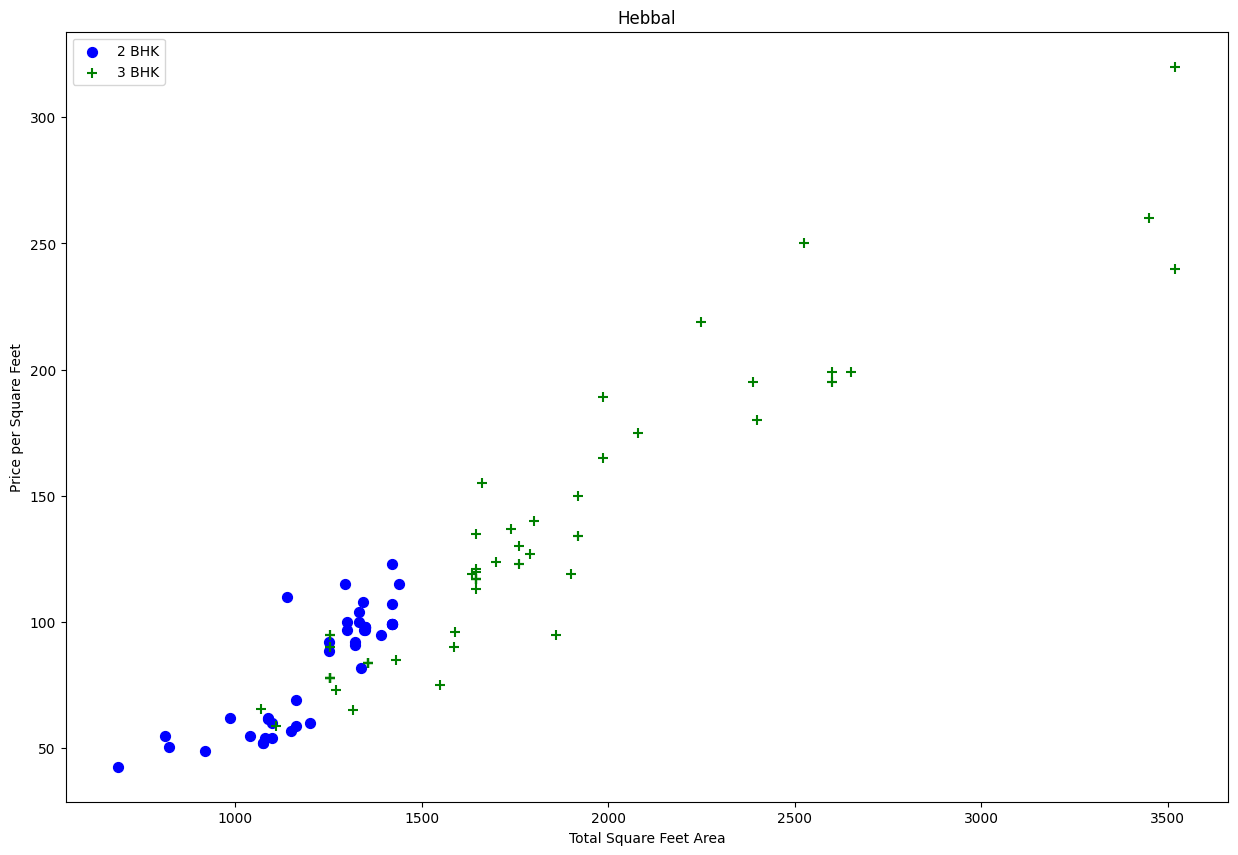

In [48]:
plot_scatter_chart(df7,"Hebbal")

In [49]:
"""Now we will create a function that calculates the mean,standard deviation and count for each BHK House
Then we will remove 2BHK Houses with price less than Mean price of 1BHK Houses
And remove 4BHK Houses with price less than Mean price of 2BHK Houses"""
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):#Grouping According to location
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby("BHK"):
            #Grouping according to BHK for the Df obtained by grouping for each location
            bhk_stats[bhk]={
                "mean":np.mean(bhk_df.price_per_sqft),
                "std":np.std(bhk_df.price_per_sqft),
                "count":bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby("BHK"):
            #Loop to find the rows to be removed
            stats=bhk_stats.get(bhk-1)#Getting Mean,std and count for BHK-1 to be used for comparison
            if stats and stats["count"]>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)
    
    return df.drop(exclude_indices,axis="index")

df8=remove_bhk_outliers(df7)
print(df8.shape)

(7329, 7)


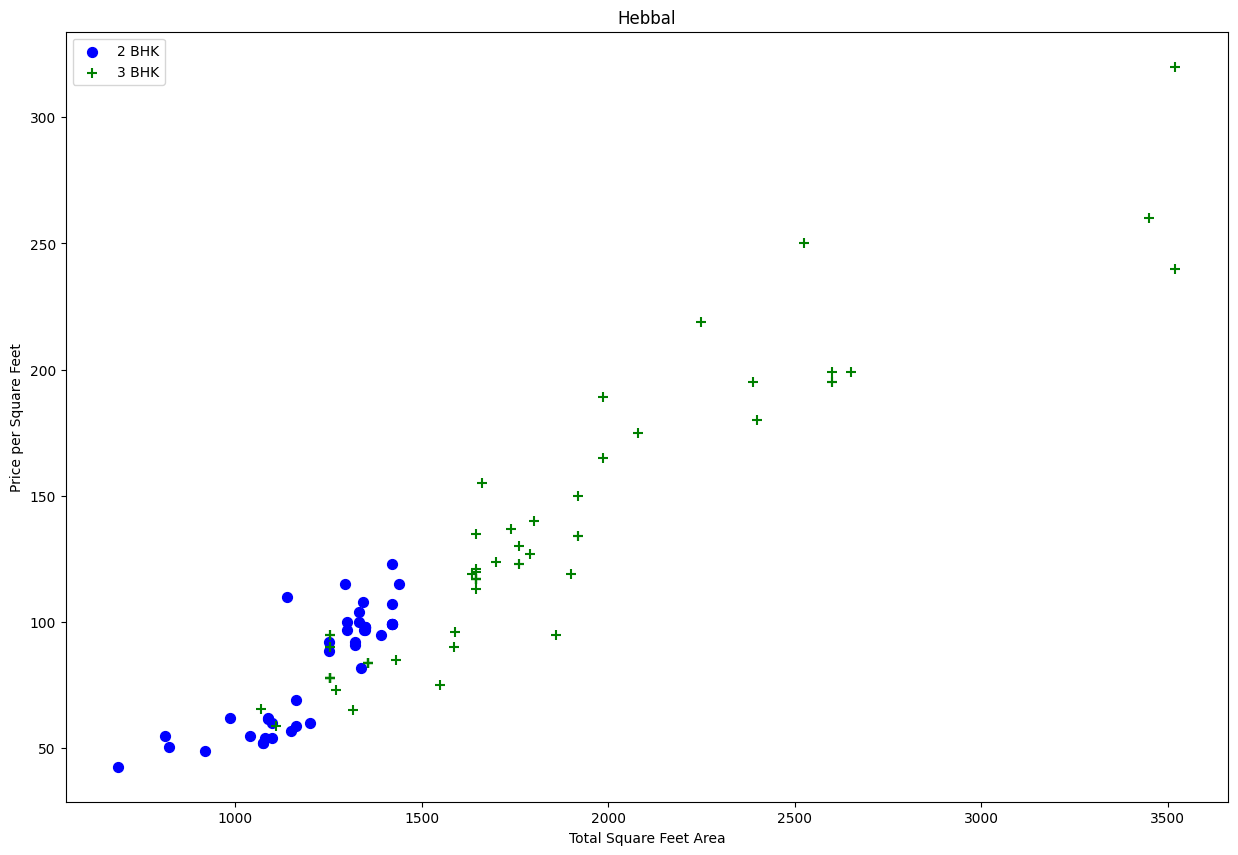

In [51]:
#Plotting the Scatter Plot to see the improvements made
plot_scatter_chart(df7,"Hebbal")

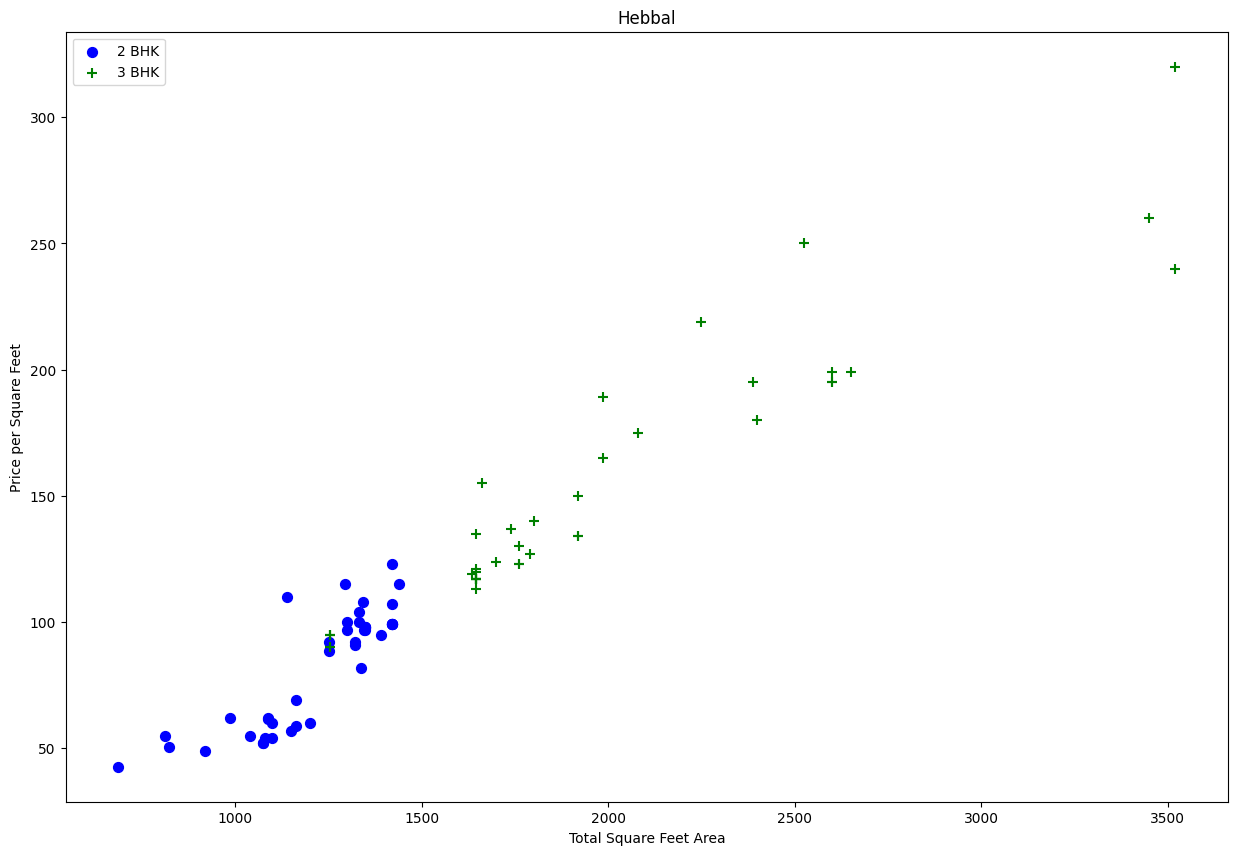

In [52]:
plot_scatter_chart(df8,"Hebbal")

In [53]:
#Most of the Abnormalities have been rempved

### Plotting Histogram to see how many properties we have price_per_sqft

Text(0, 0.5, 'Count')

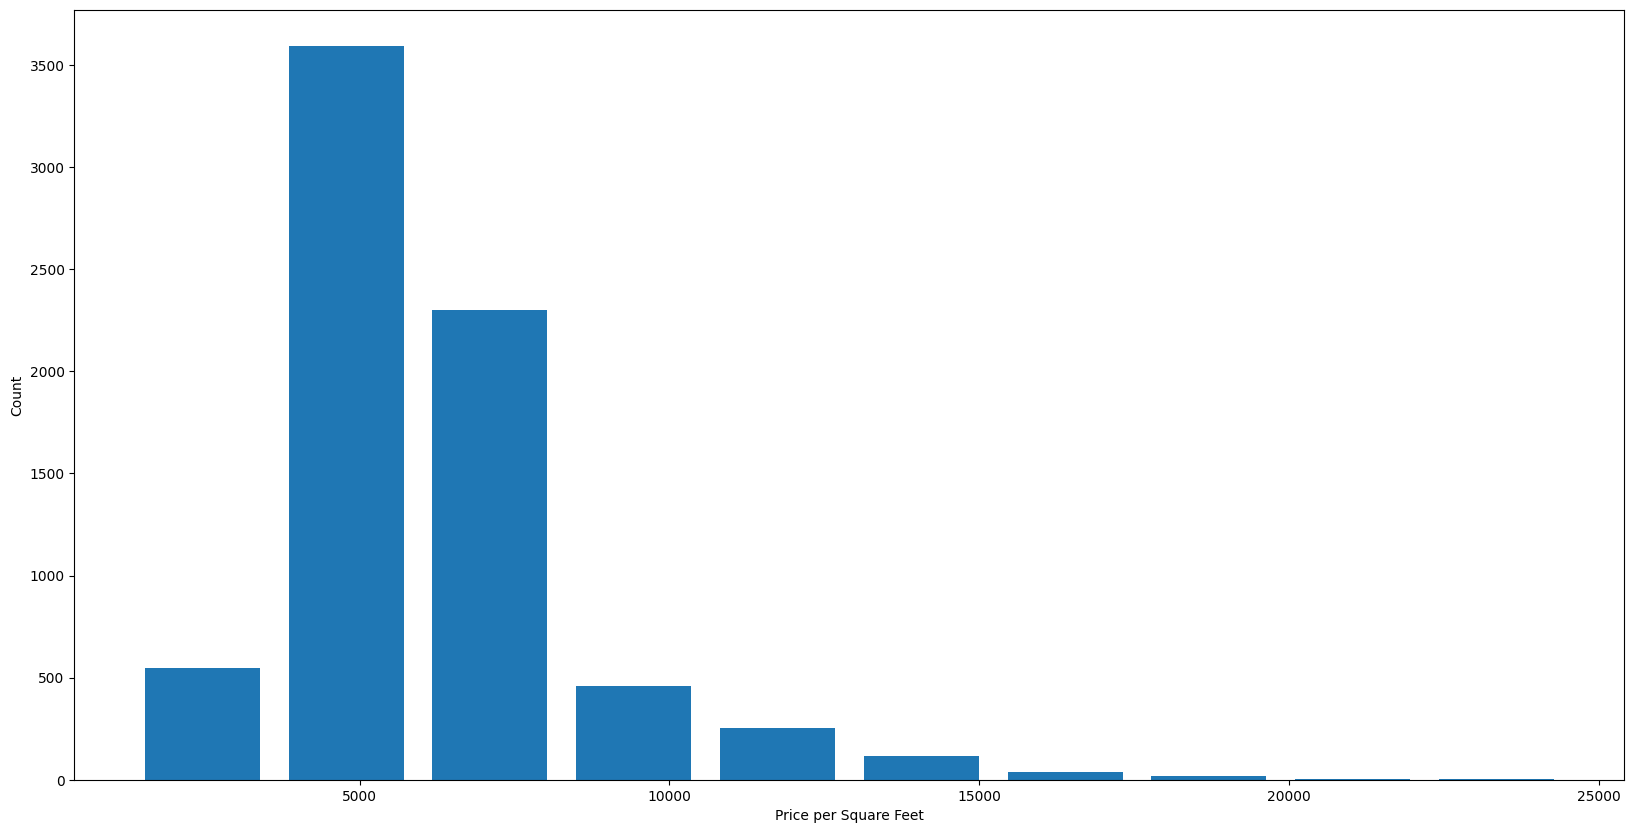

In [56]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per Square Feet")
plt.ylabel("Count")

In [57]:
"""On x-axis,we have Price per sqft and y-axis has Count
Histogram height shows Number of values in that Category
Majority of Datapoint is from 0-10000 and almost it is a Normal Distribution(Gaussian Distribution/Bell curve)"""

'On x-axis,we have Price per sqft and y-axis has Count\nHistogram height shows Number of values in that Category\nMajority of Datapoint is from 0-10000 and almost it is a Normal Distribution(Gaussian Distribution/Bell curve)'

In [58]:
#Now Let's explore the Bathroom features
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [59]:
#So values like 13 Bathrooms does not seems natural
#We also need to see the total_Sqft to see whether it is correct or not
df8[df8.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
5925,Other,10 BHK,12000.0,12.0,525.0,10,4375.000000
6014,Other,16 BHK,10000.0,16.0,550.0,16,5500.000000
6747,Other,11 BHK,6000.0,12.0,150.0,11,2500.000000
7078,Other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

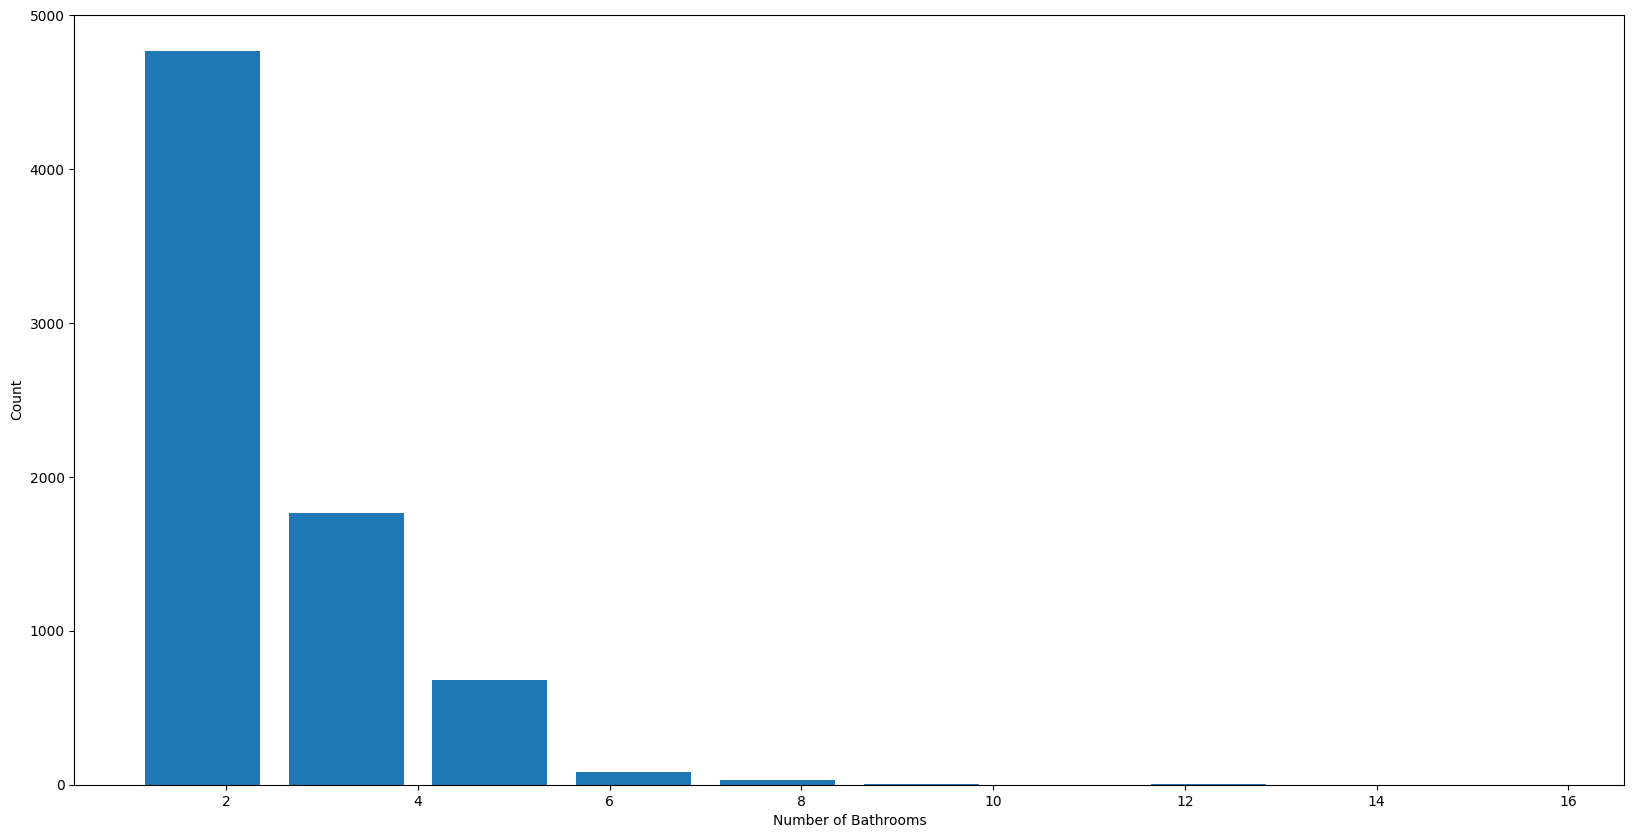

In [60]:
#To see the Distribution according to Number of bathrooms,we are drwaing a Histogram
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [61]:
"""We see most of the properties have 2-4 Bathrooms and there are very low outliers
We take criteria for Bathroom values as Outlier as-
Whenever Number of Bathrooms is greater than Number of Bedrooms+2 according to the Business Manager"""
df8[df8.bath>df8.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5850,Other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9012,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [63]:
df9=df8[df8.bath<df8.BHK+2]
print(df9.shape)

(7251, 7)


In [64]:
#Now we need to reomve the unnecessary features
"""Like size feature data is already condensed in BHK Column
And price_per_sqft column was created just for Outlier Detection"""
df10=df9.drop(columns=["size","price_per_sqft"])
df10.head(10)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4
8,1st Phase JP Nagar,1875.0,3.0,167.0,3
9,1st Phase JP Nagar,1500.0,5.0,85.0,5
10,1st Phase JP Nagar,2065.0,4.0,210.0,3


# Building Machine Learning Model

In [65]:
"""In our Dataframe, we have location Column which has Textual Data
We need to convert it to Numeric values for our ML Model to accept
We will use One Hot encoding using Pandas Dummies Method for the purpose"""
dummies=pd.get_dummies(df10.location)
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#Dropping one Column to avoid Dummy variable Trap
dummies1=dummies.drop("Other",axis="columns")
df11=pd.concat([df10,dummies1],axis="columns")
df11.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
#Now we can drop our Location Column
"""We have reached very far in our Data Processing Pipeline
Like df1-Represents 1st stage
df2-2nd Stage and df12-12th Stage"""
df12=df11.drop("location",axis="columns")
df12.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
print(df12.shape)

(7251, 245)


### Division into Dependent and Independent variable

In [85]:
x=df12.drop("price",axis="columns")
x.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
y=df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

### Train Test Split

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
#test_size=0.2=>20% data will be kept for Testing

### K Fold Cross Validation

In [75]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
cv1=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
#ShuffleSplit randomizes our sample so that each fold has equal distribution of our data samples
cross_val_score(LinearRegression(),x,y,cv=cv1)

array([0.85430675, 0.84187647, 0.84728412, 0.85171729, 0.87168018])

In [76]:
#Using Cross Validation to find best Regressors(Ridge Regression,Lasso Regression,Decision Tree Regression)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_GridSearchCV(x,y):
    #We have Dictionary with Algorithm and Hyperparameter values offered by us for GridSearchCV to select
    algos={
        "linear_regression":{
            "model":LinearRegression(),
            "params":{"normalize":[True,False]}
        },
        "lasso":{
            "model":Lasso(),
            "params":{"alpha":[1,2],"selection":["random","cyclic"]}
        },
        "decision_tree":{
            "model":DecisionTreeRegressor(),
            "params":{"criterion":["mse","friedman_mse"],"splitter":["best","random"]}
        }
    }
    
    scores=[]
    cv1=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,configuration in algos.items():
        GridSearch=GridSearchCV(configuration["model"],configuration["params"],cv=cv1,return_train_score=False)
        GridSearch.fit(x,y)
        scores.append({
            "model":algo_name,
            "best_score":GridSearch.best_score_,
            "best_parameters":GridSearch.best_params_
        })
        
    return pd.DataFrame(scores,columns=["model","best_score","best_parameters"])

find_best_model_using_GridSearchCV(x,y)

C:\Python3.10\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Python3.10\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(Standar

,model,best_score,best_parameters
0,linear_regression,0.853373,{'normalize': False}
1,lasso,0.727543,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.695624,"{'criterion': 'mse', 'splitter': 'best'}"


In [77]:
#We see Linear Regression is Model with Best score and Hyperparameters set to Normalize=False
from sklearn.linear_model import LinearRegression
LrObject=LinearRegression()
LrObject.fit(x_train,y_train)
LrObject.score(x_test,y_test)

0.8691914452174364

# Property Price Prediction

In [78]:
x.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [79]:
np.where(x.columns=='5th Block Hbr Layout')[0][0]

7

In [88]:
def predict_price(inputlocation,sqft,bath,bhk):
    inputlocation_index=np.where(x.columns==inputlocation)[0][0]
    
    X=np.zeros(len(x.columns))
    X[0]=sqft
    X[1]=bath
    X[2]=bhk
    if(inputlocation_index>=0):
            X[inputlocation_index]=1
            
    return LrObject.predict([X])[0]

In [89]:
predict_price("1st Phase JP Nagar",1000,2,2)#Price unit is in Lakhs

C:\Python3.10\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.81981031349014

In [90]:
predict_price("1st Phase JP Nagar",1000,2,3)

C:\Python3.10\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.65568746323794

In [91]:
predict_price("Indira Nagar",1000,2,2)

C:\Python3.10\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


179.37066882807494

In [92]:
predict_price("Indira Nagar",1000,3,3)

C:\Python3.10\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


177.68734072817426

# Exporting Model for Hosting by Flask Server

In [93]:
import pickle
with open("Banglore_House_Price_Model.pickle","wb") as file:
    pickle.dump(LrObject,file)

In [94]:
#Saving Information about the Columns
import json
columns={
    "data_columns":[col.lower() for col in x.columns]
}
with open("Columns.json","w") as file:
    file.write(json.dumps(columns))